In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv(r"C:\Users\DELL\Desktop\Uday\Machine Learning\Dynamic Pricing\dynamic_pricing.csv")

In [6]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [10]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [22]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [28]:
df.duplicated().sum()

0

# EDA

In [33]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


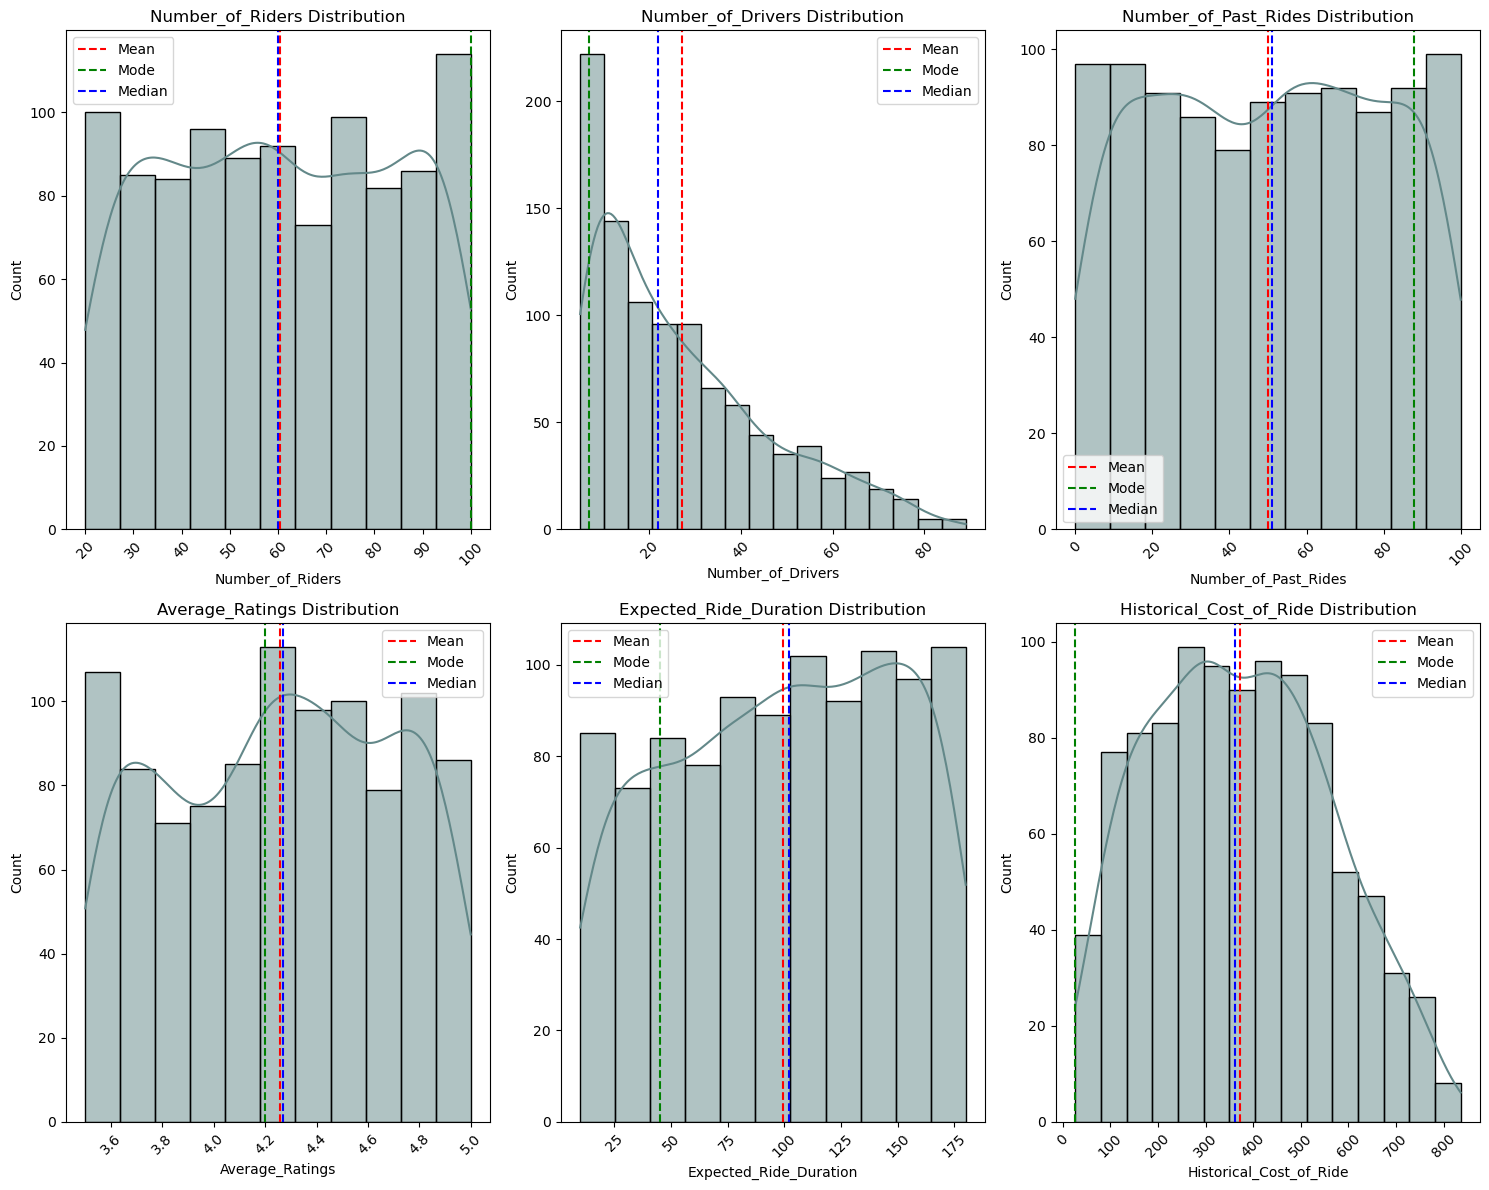

In [35]:
Numeric_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings','Expected_Ride_Duration','Historical_Cost_of_Ride']

plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=col, kde=True,color='#638889')
    
    col_mean = df[col].mean()
    col_mode = df[col].mode()[0]
    col_median = df[col].median()

    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_mode, color="green", linestyle="--", label="Mode")
    plt.axvline(col_median, color="blue", linestyle="--", label="Median")

    plt.legend()
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [ ]:
# Obeservation:
# 1. Supply-and-demand imbalance is obvious
# Number of Riders is roughly symmetric, while Number of Drivers is sharply right-skewed

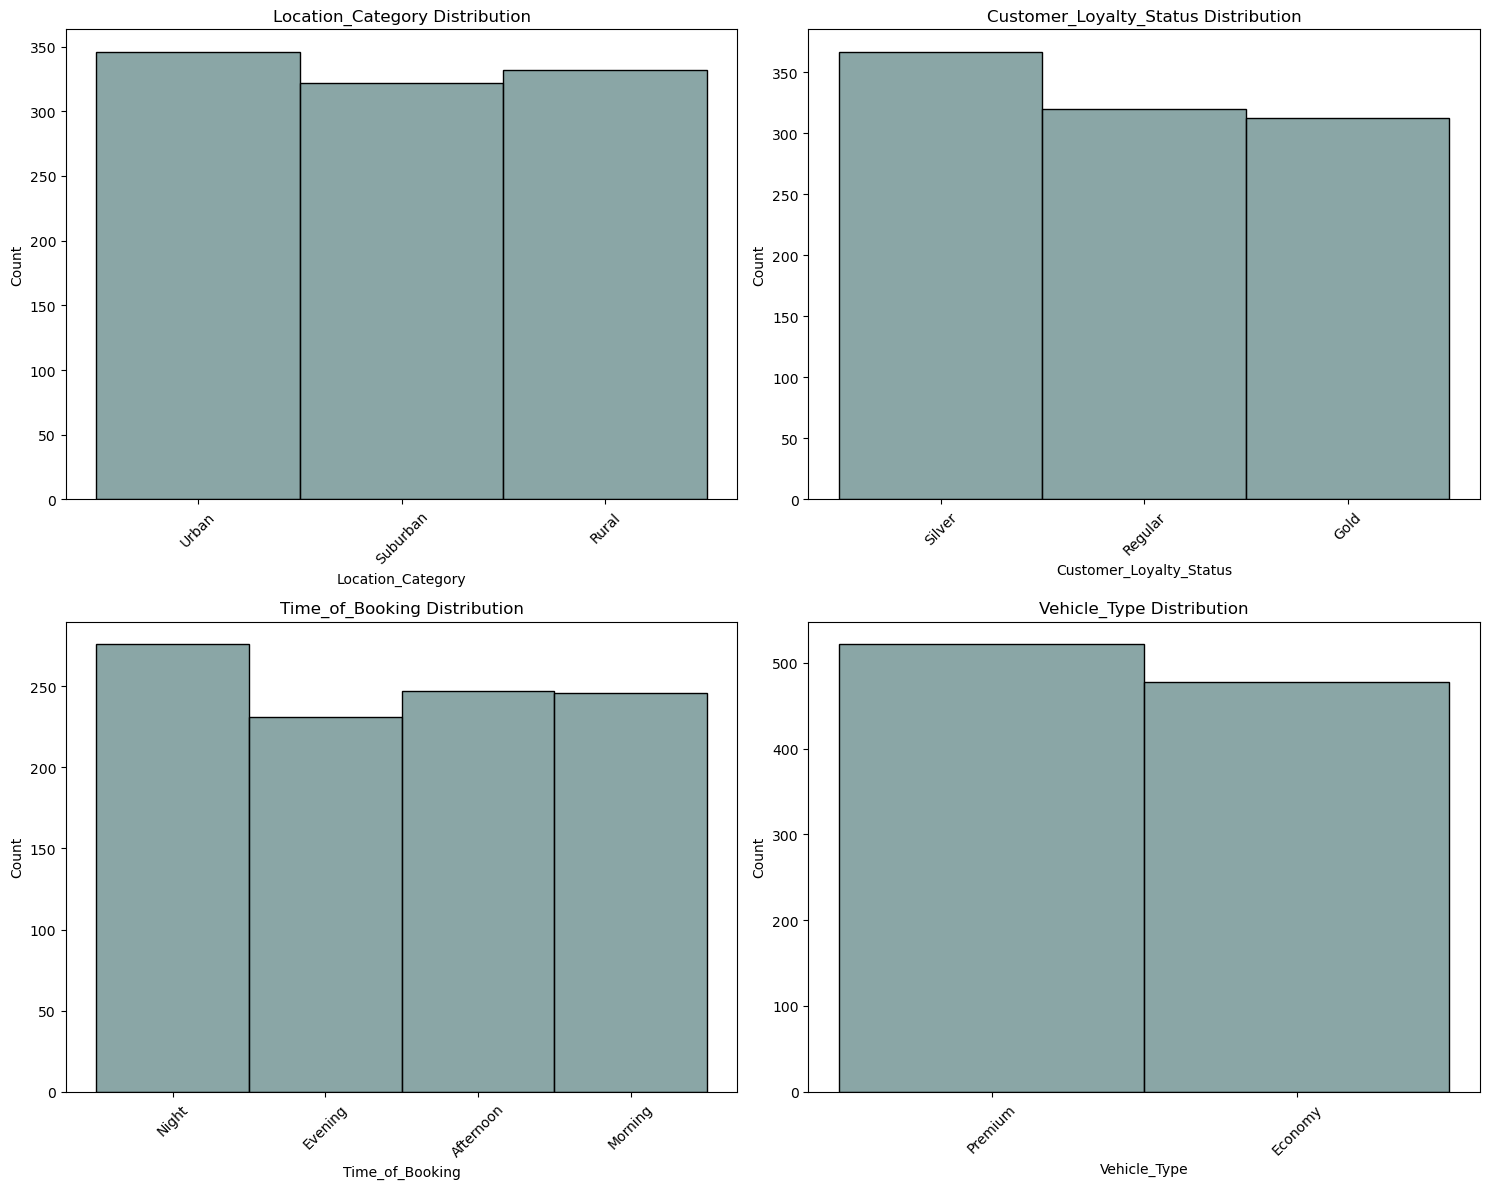

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

object_cols = [
    'Location_Category',
    'Customer_Loyalty_Status',
    'Time_of_Booking',
    'Vehicle_Type'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(object_cols):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, color='#638889', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# apply tight layout once, for the entire figure
plt.tight_layout()
plt.show()


In [ ]:
# Observation: 
# No Heavy Class Imbalance


# Outllier 

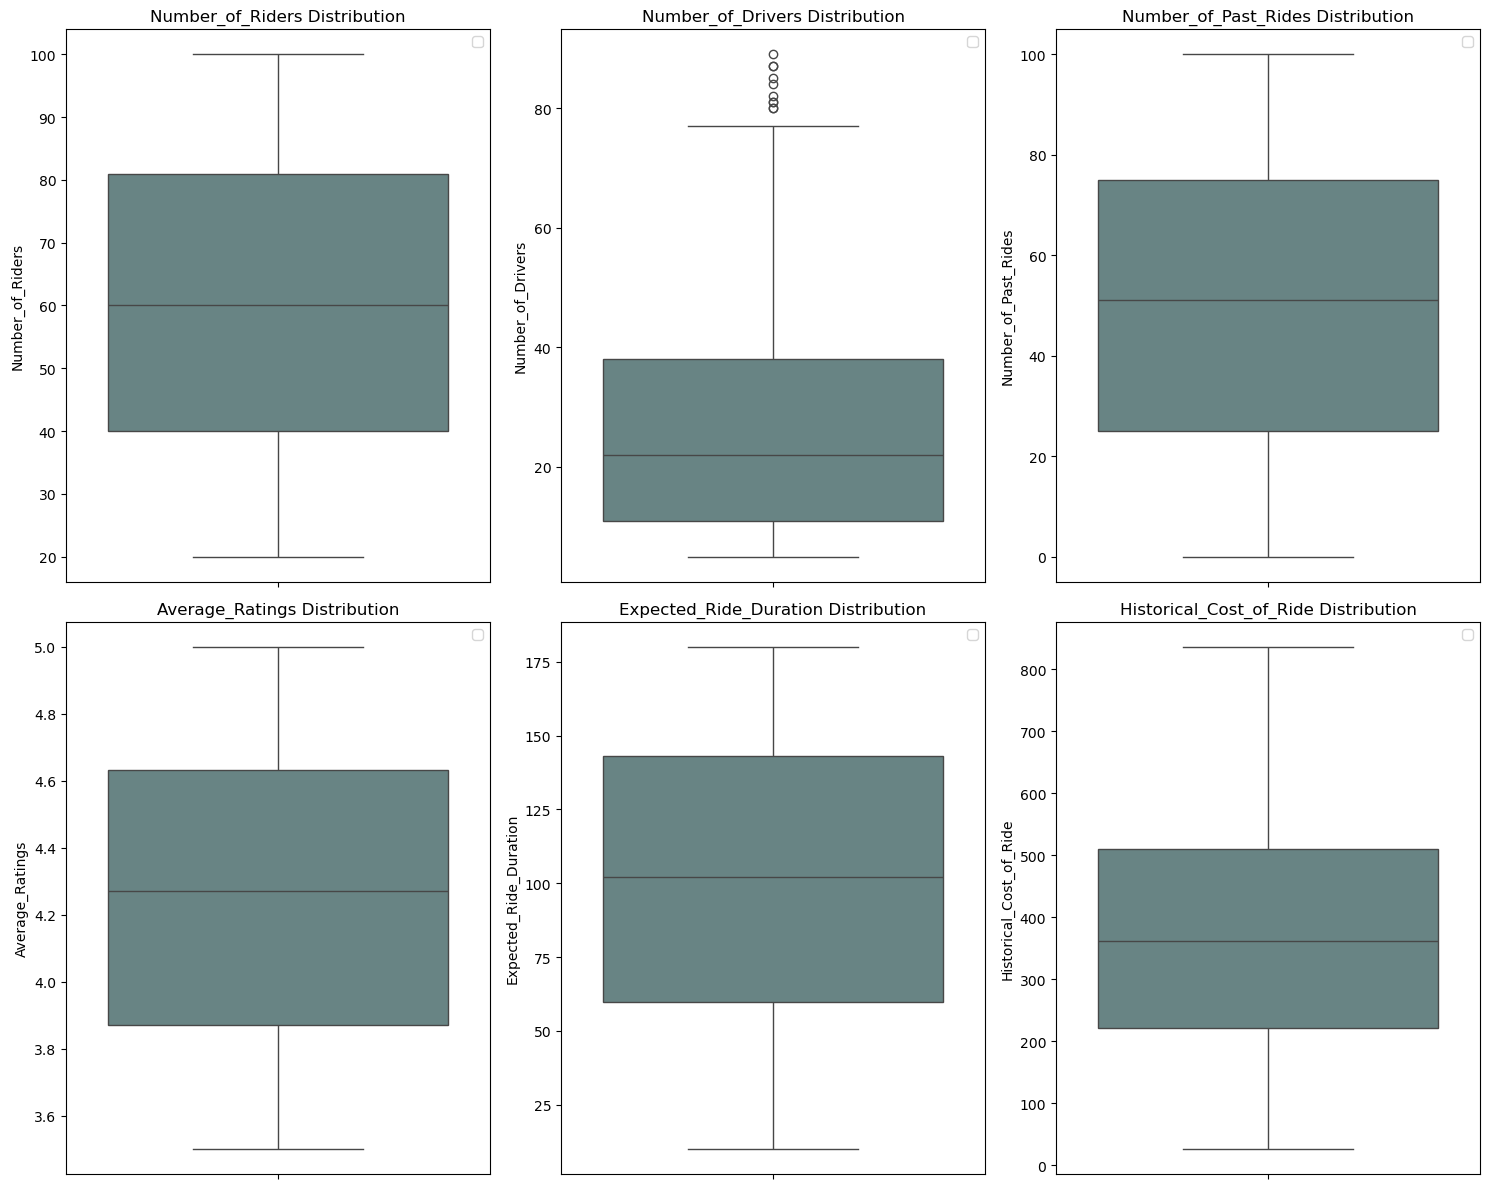

In [88]:
Numeric_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings','Expected_Ride_Duration','Historical_Cost_of_Ride']

plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col,color='#638889')

    plt.legend()
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Outlier counts per column:
Number_of_Riders           0
Number_of_Drivers          4
Number_of_Past_Rides       0
Average_Ratings            0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


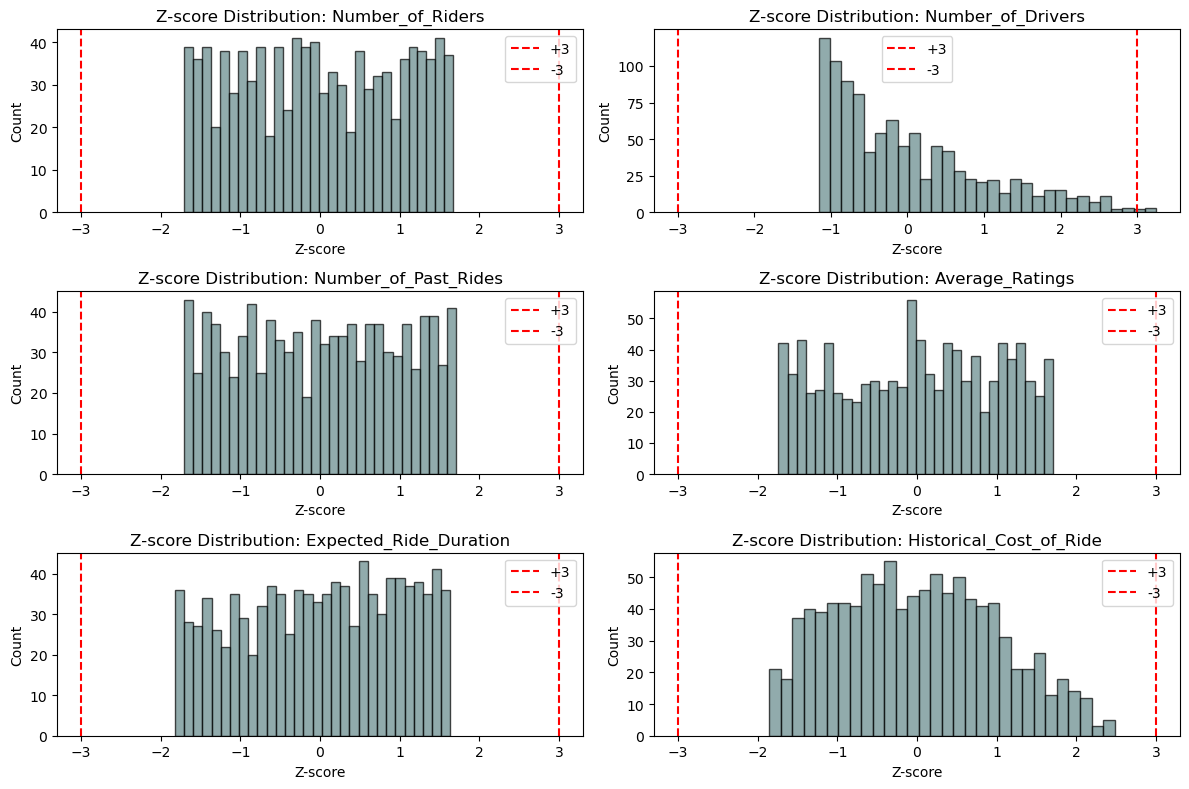

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1. Compute Z-scores for your numeric columns
numeric_cols = [
    'Number_of_Riders',
    'Number_of_Drivers',
    'Number_of_Past_Rides',
    'Average_Ratings',
    'Expected_Ride_Duration',
    'Historical_Cost_of_Ride'
]

# create a DataFrame of z-scores
z_df = df[numeric_cols].apply(zscore)

# 2. Flag potential outliers
threshold = 3
outliers = (np.abs(z_df) > threshold)

# 3. How many outliers per column?
print("Outlier counts per column:")
print(outliers.sum())

# 4. Plot distributions of Z-scores
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    plt.hist(z_df[col], bins=30, edgecolor='k', alpha=0.7, color='#638889')
    plt.axvline(threshold, color='r', linestyle='--', label=f'+{threshold}')
    plt.axvline(-threshold, color='r', linestyle='--', label=f'-{threshold}')
    plt.title(f'Z-score Distribution: {col}')
    plt.xlabel('Z-score')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()


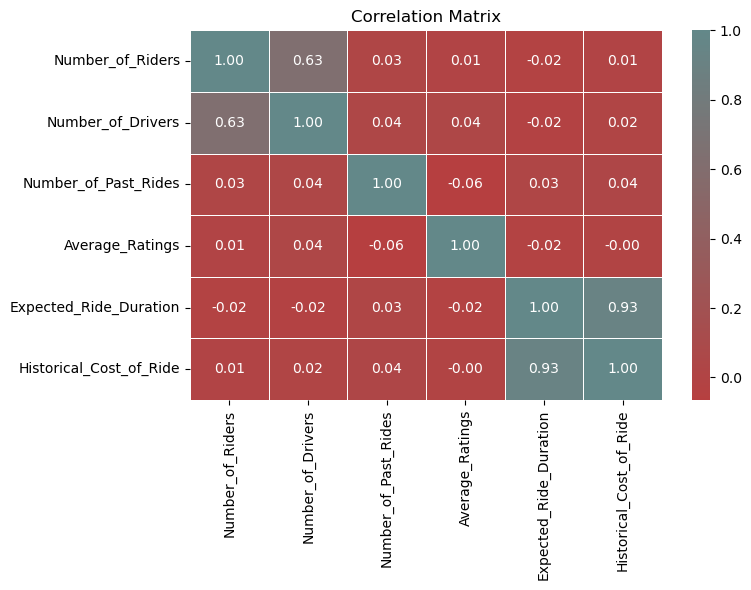

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 1) Create a custom colormap from red to your green‐teal
custom_cmap = LinearSegmentedColormap.from_list(
    "red_to_custom",
    ["#FF0000", "#638889"],  # start=red, end=#638889
)

# 2) Compute your corr matrix
numeric_cols = [
    'Number_of_Riders',
    'Number_of_Drivers',
    'Number_of_Past_Rides',
    'Average_Ratings',
    'Expected_Ride_Duration',
    'Historical_Cost_of_Ride'
]
corr_matrix = df[numeric_cols].corr()

# 3) Plot heatmap with your custom cmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=custom_cmap,      # <— your gradient here
    center=0,              # ensures 0 is the mid‐point of the colormap
    fmt=".2f",
    linewidths=.5,
)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


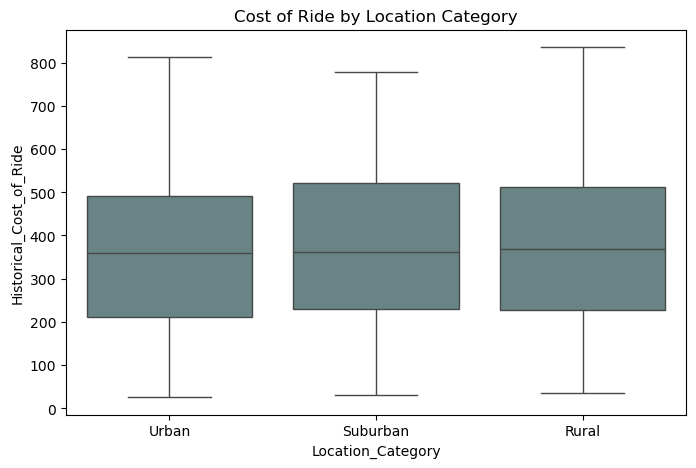

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Location_Category', y='Historical_Cost_of_Ride', color='#638889')
plt.title('Cost of Ride by Location Category')
plt.show()


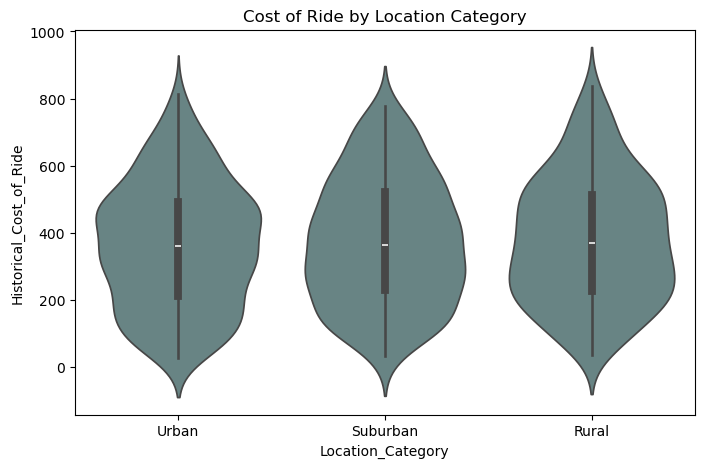

In [110]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Location_Category', y='Historical_Cost_of_Ride', color='#638889')
plt.title('Cost of Ride by Location Category')
plt.show()


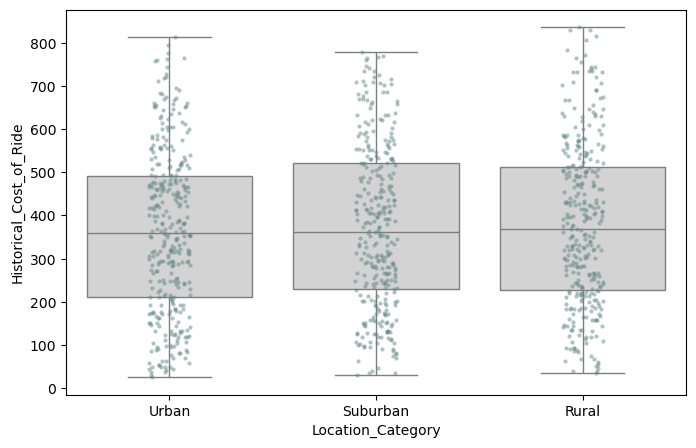

In [112]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Location_Category', y='Historical_Cost_of_Ride', color='lightgray')
sns.stripplot(data=df, x='Location_Category', y='Historical_Cost_of_Ride',
              jitter=True, size=3, color='#638889', alpha=0.5)
plt.show()


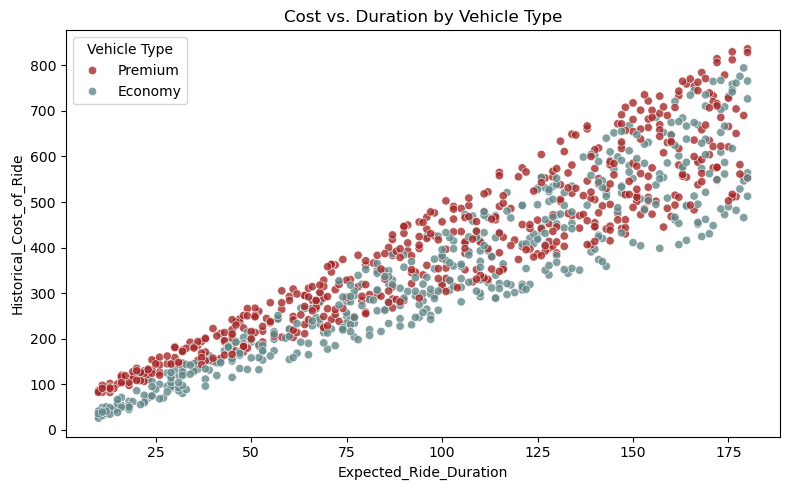

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Expected_Ride_Duration',
    y='Historical_Cost_of_Ride',
    hue='Vehicle_Type',
    palette={
        'Economy': '#638889',
        'Premium': 'brown'
    },
    edgecolor='w',    # optional: white edge so points pop
    alpha=0.8
)
plt.title('Cost vs. Duration by Vehicle Type')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()


In [128]:
df.dtypes


Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

# Feature Engineering

In [167]:
import numpy as np
import pandas as pd

# ----------------------------------------
# 1.  Core surge logic  ⟶  ratio-based
# ----------------------------------------
def apply_dynamic_pricing(df,
                          min_mult=0.80,   # 20 % discount floor
                          max_mult=1.50):  # 50 % surge cap
    """
    Adds 'surge_multiplier' and 'adjusted_ride_cost' columns in-place.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Must contain 'Number_of_Riders', 'Number_of_Drivers',
        and 'Historical_Cost_of_Ride'.
    min_mult : float
        Lower bound on the multiplier (e.g., 0.8 = 20 % discount).
    max_mult : float
        Upper bound on the multiplier (e.g., 1.5 = 50 % surge).
    """
    # 1-a. Demand-supply tightness
    df['ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']
    
    # 1-b. Clip to allowed band
    df['surge_multiplier'] = df['ratio'].clip(lower=min_mult, upper=max_mult)
    
    # 1-c. Base adjusted fare
    df['adjusted_ride_cost'] = (
        df['Historical_Cost_of_Ride'] * df['surge_multiplier']
    )
    
    return df

df = apply_dynamic_pricing(df)        # ← one-liner call


In [173]:
# 2-a. Time-of-day bump
time_map = {
    'Morning'  : 1.00,
    'Afternoon': 1.05,
    'Evening'  : 1.10,
    'Night'    : 1.15
}
df['time_mod'] = df['Time_of_Booking'].map(time_map).fillna(1.0)

# 2-b. Loyalty / risk offset
loyalty_map = {
    'Gold'   : 0.90,   # 10 % discount for best customers
    'Silver' : 0.95,
    'Regular': 1.00
}
df['loyalty_mod'] = df['Customer_Loyalty_Status'].map(loyalty_map).fillna(1.0)

# 2-c. Final fare
df['final_fare'] = (
    df['Historical_Cost_of_Ride'] *
    df['surge_multiplier'] *
    df['time_mod'] *
    df['loyalty_mod']
)


In [177]:
print(df[['ratio','surge_multiplier']].describe())

# Spot-check a handful of rows
display( df.sample(10)[
    ['Number_of_Riders','Number_of_Drivers',
     'ratio','surge_multiplier','Historical_Cost_of_Ride','final_fare']
] )


             ratio  surge_multiplier
count  1000.000000       1000.000000
mean      3.235461          1.468307
std       2.533519          0.080578
min       1.112360          1.112360
25%       1.658793          1.500000
50%       2.357143          1.500000
75%       3.800000          1.500000
max      17.600000          1.500000


,Number_of_Riders,Number_of_Drivers,ratio,surge_multiplier,Historical_Cost_of_Ride,final_fare
198,39,29,1.344828,1.344828,251.107306,352.892354
461,93,73,1.273973,1.273973,465.962682,682.667244
454,86,76,1.131579,1.131579,612.446727,796.986596
820,95,56,1.696429,1.500000,671.471209,956.846473
732,36,16,2.250000,1.500000,253.491244,399.248709
744,40,18,2.222222,1.500000,644.044576,963.651696
71,91,73,1.246575,1.246575,62.254290,80.320827
203,81,34,2.382353,1.500000,554.886966,830.249623
66,40,29,1.379310,1.379310,624.986010,905.152152
671,30,6,5.000000,1.500000,505.921969,834.771249


# Profit evaluation

In [274]:
# absolute profit per ride
df['profit_amount'] = df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']

# relative margin (%)
df['profit_pct'] = df['profit_amount'] / df['Historical_Cost_of_Ride'] * 100


In [276]:
overall_profit = df['profit_amount'].sum()
overall_margin = overall_profit / df['Historical_Cost_of_Ride'].sum()

print(f"Total profit   : {overall_profit:,.0f}")
print(f"Overall margin   : {overall_margin:.2%}")


Total profit   : -366,367
Overall margin   : -98.35%


In [278]:
# Split rides into win / loss buckets

df['is_profitable'] = df['profit_amount'] > 0
bucket_counts = df['is_profitable'].value_counts()


In [280]:
# checking skew 
import pandas as pd

# df = your pandas DataFrame ----------------------------------------------

# 1) Pick only numeric columns (int or float)
numeric_cols = df.select_dtypes(include=['number'])

# 2) Compute skew for each numeric column
skew_values = numeric_cols.skew()           # pandas uses Fisher–Pearson coeff.

# 3) Put the result in a neat table, sorted by absolute skew
skew_df = (
    skew_values
    .sort_values(ascending=False)
    .to_frame(name='Skew')
)

print(skew_df)


                             Skew
profit_pct               2.854142
ratio                    2.548206
Number_of_Drivers        0.963204
final_fare               0.281812
Historical_Cost_of_Ride  0.209580
Number_of_Riders         0.002167
Number_of_Past_Rides    -0.008457
loyalty_mod             -0.012514
time_mod                -0.030177
Average_Ratings         -0.078754
Expected_Ride_Duration  -0.139868
profit_amount           -0.213165
adjusted_ride_cost      -1.079154
adjusted_ride_cost_raw  -1.079154
surge_multiplier        -2.668908


In [282]:
from sklearn.preprocessing import PowerTransformer

# Initialize the transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit & transform the single-column DataFrame, then flatten back to a Series
df['surge_multiplier_pt'] = pt.fit_transform(df[['surge_multiplier']]).ravel()


In [300]:
from sklearn.preprocessing import PowerTransformer

# Initialize the transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit & transform the single-column DataFrame, then flatten back to a Series
df['adjusted_ride_cost_pt'] = pt.fit_transform(df[['adjusted_ride_cost']]).ravel()


In [286]:
from scipy.stats import boxcox

# Ensure strictly positive
ratio_shifted = df['ratio'] + 1e-6

# Apply Box-Cox transformation
df['ratio_boxcox'], fitted_lambda = boxcox(ratio_shifted)


In [290]:
from scipy.stats import boxcox

# Check for minimum value and shift only if needed
if (df['profit_pct'] <= 0).any():
    profit_pct_shifted = df['profit_pct'] - df['profit_pct'].min() + 1e-6
else:
    profit_pct_shifted = df['profit_pct']

# Apply Box-Cox transformation
df['profit_pct_boxcox'], fitted_lambda = boxcox(profit_pct_shifted)


In [296]:
from scipy.stats import boxcox

# Check for minimum value and shift only if needed
if (df['Number_of_Drivers'] <= 0).any():
    Number_of_Drivers_shifted = df['Number_of_Drivers'] - df['Number_of_Drivers'].min() + 1e-6
else:
    Number_of_Drivers_shifted = df['Number_of_Drivers']

# Apply Box-Cox transformation
df['Number_of_Drivers_boxcox'], fitted_lambda = boxcox(Number_of_Drivers_shifted)


In [306]:
# checking skew 
import pandas as pd

# df = your pandas DataFrame ----------------------------------------------

# 1) Pick only numeric columns (int or float)
numeric_cols = df.select_dtypes(include=['number'])

# 2) Compute skew for each numeric column
skew_values = numeric_cols.skew()           # pandas uses Fisher–Pearson coeff.

# 3) Put the result in a neat table, sorted by absolute skew
skew_df = (
    skew_values
    .sort_values(ascending=False)
    .to_frame(name='Skew')
)

print(skew_df)


                              Skew
profit_pct                2.854142
ratio                     2.548206
Number_of_Drivers         0.963204
final_fare                0.281812
Historical_Cost_of_Ride   0.209580
ratio_boxcox              0.115469
profit_pct_boxcox         0.081748
Number_of_Riders          0.002167
Number_of_Past_Rides     -0.008457
loyalty_mod              -0.012514
Number_of_Drivers_boxcox -0.021962
time_mod                 -0.030177
Average_Ratings          -0.078754
Expected_Ride_Duration   -0.139868
adjusted_ride_pt         -0.162834
adjusted_ride_cost_pt    -0.162834
profit_amount            -0.213165
adjusted_ride_cost       -1.079154
surge_multiplier_pt      -1.778190
surge_multiplier         -2.668908


In [308]:
from sklearn.preprocessing import PowerTransformer

# Initialize the transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit & transform the single-column DataFrame, then flatten back to a Series
df['surge_multiplier_pt_pt'] = pt.fit_transform(df[['surge_multiplier_pt']]).ravel()


In [334]:
# checking skew 
import pandas as pd

# df = your pandas DataFrame ----------------------------------------------

# 1) Pick only numeric columns (int or float)
numeric_cols = df.select_dtypes(include=['number'])

# 2) Compute skew for each numeric column
skew_values = numeric_cols.skew()           # pandas uses Fisher–Pearson coeff.

# 3) Put the result in a neat table, sorted by absolute skew
skew_df = (
    skew_values
    .sort_values(ascending=False)
    .to_frame(name='Skew')
)

print(skew_df)


                              Skew
profit_pct                2.854142
ratio                     2.548206
Number_of_Drivers         0.963204
final_fare                0.281812
Historical_Cost_of_Ride   0.209580
ratio_boxcox              0.115469
profit_pct_boxcox         0.081748
Number_of_Riders          0.002167
Number_of_Past_Rides     -0.008457
loyalty_mod              -0.012514
Number_of_Drivers_boxcox -0.021962
time_mod                 -0.030177
Average_Ratings          -0.078754
Expected_Ride_Duration   -0.139868
adjusted_ride_pt         -0.162834
adjusted_ride_cost_pt    -0.162834
profit_amount            -0.213165
adjusted_ride_cost       -1.079154
surge_multiplier_pt      -1.778190
surge_multiplier_qt      -2.255909
surge_multiplier         -2.668908


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Number_of_Riders          1000 non-null   int64  
 1   Number_of_Drivers         1000 non-null   int64  
 2   Location_Category         1000 non-null   object 
 3   Customer_Loyalty_Status   1000 non-null   object 
 4   Number_of_Past_Rides      1000 non-null   int64  
 5   Average_Ratings           1000 non-null   float64
 6   Time_of_Booking           1000 non-null   object 
 7   Vehicle_Type              1000 non-null   object 
 8   Expected_Ride_Duration    1000 non-null   int64  
 9   Historical_Cost_of_Ride   1000 non-null   float64
 10  ratio                     1000 non-null   float64
 11  surge_multiplier          1000 non-null   float64
 12  adjusted_ride_cost        1000 non-null   float64
 13  time_mod                  1000 non-null   float64
 14  loyalty_m

In [336]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,profit_amount,is_profitable,profit_pct,surge_multiplier_pt,adjusted_ride_pt,ratio_boxcox,profit_pct_boxcox,Number_of_Drivers_boxcox,adjusted_ride_cost_pt,surge_multiplier_qt
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,-278.199586,False,-97.868942,2.539376e+25,7545.585617,0.561215,0.249788,4.494508,7545.585617,0.227777
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,-168.315676,False,-96.802827,1.785994e+25,5066.756547,0.351002,0.910675,4.297948,5066.756547,-0.933910
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,-323.691078,False,-98.149037,4.230599e+23,7821.012811,0.276308,-0.002393,3.987560,7821.012811,-1.307063
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,-463.641189,False,-98.604844,2.539376e+25,10965.078115,0.820311,-0.584597,3.851875,10965.078115,0.227777
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,-572.912329,False,-98.832274,2.539376e+25,12717.528176,0.871116,-1.059175,3.535029,12717.528176,0.227777


In [356]:
# Categorical Columns
categorical_cols = ['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type','is_profitable']


# Show unique values for categorical columns
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}\n")


Unique values in categorical columns:
Location_Category: [2 1 0]

Customer_Loyalty_Status: [2 1 0]

Time_of_Booking: [3 1 0 2]

Vehicle_Type: [1 0]

is_profitable: [0]



In [350]:
from sklearn.preprocessing import LabelEncoder
import pickle

# List of categorical columns to encode

col = ['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type','is_profitable']


# Dictionary to store encoders
encoders = {}

# Apply label encoding and store encoders
for i in col:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])
    encoders[i] = label_encoder

# Save all encoders in one pickle file AFTER the loop
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)


In [352]:
encoders

{'Location_Category': LabelEncoder(),
 'Customer_Loyalty_Status': LabelEncoder(),
 'Time_of_Booking': LabelEncoder(),
 'Vehicle_Type': LabelEncoder(),
 'is_profitable': LabelEncoder()}

In [354]:
# Categorical Columns
categorical_cols = ['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type','is_profitable']


# Show unique values for categorical columns
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}\n")


Unique values in categorical columns:
Location_Category: [2 1 0]

Customer_Loyalty_Status: [2 1 0]

Time_of_Booking: [3 1 0 2]

Vehicle_Type: [1 0]

is_profitable: [0]



In [360]:
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,profit_amount,is_profitable,profit_pct,surge_multiplier_pt,adjusted_ride_pt,ratio_boxcox,profit_pct_boxcox,Number_of_Drivers_boxcox,adjusted_ride_cost_pt,surge_multiplier_qt
0,90,45,2,2,13,4.47,3,1,90,284.257273,...,-278.199586,0,-97.868942,2.539376e+25,7545.585617,0.561215,0.249788,4.494508,7545.585617,0.227777
1,58,39,1,2,72,4.06,1,0,43,173.874753,...,-168.315676,0,-96.802827,1.785994e+25,5066.756547,0.351002,0.910675,4.297948,5066.756547,-0.933910
2,42,31,0,2,0,3.99,0,1,76,329.795469,...,-323.691078,0,-98.149037,4.230599e+23,7821.012811,0.276308,-0.002393,3.987560,7821.012811,-1.307063
3,89,28,0,1,67,4.31,0,1,134,470.201232,...,-463.641189,0,-98.604844,2.539376e+25,10965.078115,0.820311,-0.584597,3.851875,10965.078115,0.227777
4,78,22,0,1,74,3.77,0,0,149,579.681422,...,-572.912329,0,-98.832274,2.539376e+25,12717.528176,0.871116,-1.059175,3.535029,12717.528176,0.227777


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Number_of_Riders          1000 non-null   int64  
 1   Number_of_Drivers         1000 non-null   int64  
 2   Location_Category         1000 non-null   int64  
 3   Customer_Loyalty_Status   1000 non-null   int64  
 4   Number_of_Past_Rides      1000 non-null   int64  
 5   Average_Ratings           1000 non-null   float64
 6   Time_of_Booking           1000 non-null   int64  
 7   Vehicle_Type              1000 non-null   int64  
 8   Expected_Ride_Duration    1000 non-null   int64  
 9   Historical_Cost_of_Ride   1000 non-null   float64
 10  ratio                     1000 non-null   float64
 11  surge_multiplier          1000 non-null   float64
 12  adjusted_ride_cost        1000 non-null   float64
 13  time_mod                  1000 non-null   float64
 14  loyalty_m

# modeling

In [377]:
target   = 'final_fare'
num_cols = [
    'Number_of_Riders', 'Number_of_Drivers',
    'Number_of_Past_Rides', 'Average_Ratings',
    'Expected_Ride_Duration',   # already log-like, so leave as-is
]
cat_cols = [
    'Location_Category', 'Customer_Loyalty_Status',
    'Time_of_Booking', 'Vehicle_Type'
]

x = df[num_cols + cat_cols]
y = df[target]


In [379]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [381]:
# Check the shapes
print("X_train shape:", x.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", x_train.shape)

X_train shape: (1000, 9)
X_test shape: (200, 9)
y_train shape: (800, 9)


In [405]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_models(x, y, cv=5):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Support Vector Regressor': make_pipeline(StandardScaler(), SVR())
    }

    results = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    for name, model in models.items():
        try:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_train_pred = model.predict(x_train)

            cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='r2')
            cv_r2 = np.mean(cv_scores)

            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results.append({
                'Model': name,
                'CV R²': round(cv_r2, 4),
                'Test R²': round(r2, 4),
                'MAE': round(mae, 4),
                'MSE': round(mse, 4),
                'RMSE': round(np.sqrt(mse), 4)
            })

        except Exception as e:
            print(f"❌ Model {name} failed: {e}")
    
    return pd.DataFrame(results).sort_values(by='Test R²', ascending=False)


In [407]:
target = 'final_fare'
num_cols = [
    'Number_of_Riders', 'Number_of_Drivers',
    'Number_of_Past_Rides', 'Average_Ratings',
    'Expected_Ride_Duration'
]
cat_cols = [
    'Location_Category', 'Customer_Loyalty_Status',
    'Time_of_Booking', 'Vehicle_Type'
]

x = df[num_cols + cat_cols]
y = df[target]

# Optional: if categorical columns are not encoded
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

# Run regression evaluation
regression_results = evaluate_regression_models(x, y)
print(regression_results)


                      Model   CV R²  Test R²       MAE         MSE      RMSE
2          Lasso Regression  0.8610   0.8694   82.0867  11118.9230  105.4463
0         Linear Regression  0.8613   0.8692   82.1183  11136.1543  105.5280
1          Ridge Regression  0.8613   0.8692   82.1213  11136.7271  105.5307
4             Random Forest  0.8431   0.8380   90.6018  13799.5853  117.4716
3             Decision Tree  0.6887   0.6954  120.6755  25939.6445  161.0579
5  Support Vector Regressor  0.0317   0.0837  231.3474  78041.0480  279.3583


In [ ]:
# observation:
# 1. Lasso wins by a small margin — and it’s also useful if you want to identify important features (it shrinks coefficients of less useful ones).
# 2. Linear and Ridge Regression are almost tied with Lasso.
# 3. Random Forest does OK, but adds complexity and training cost with little performance gain in this case.
# 4. SVR is clearly not working — either the kernel isn't helping, or your data scale/hyperparams aren't ideal.

In [409]:
lasso = Lasso().fit(x, y)
feature_importance = pd.Series(lasso.coef_, index=x.columns).sort_values(key=abs, ascending=False)
print(feature_importance)


Vehicle_Type_1               65.251328
Customer_Loyalty_Status_1    57.447992
Time_of_Booking_3            37.592146
Customer_Loyalty_Status_2    27.718221
Time_of_Booking_2           -24.191384
Time_of_Booking_1             5.699047
Expected_Ride_Duration        5.303950
Average_Ratings               4.013664
Number_of_Drivers            -0.660963
Number_of_Riders              0.327295
Number_of_Past_Rides          0.045828
Location_Category_1           0.000000
Location_Category_2           0.000000
dtype: float64


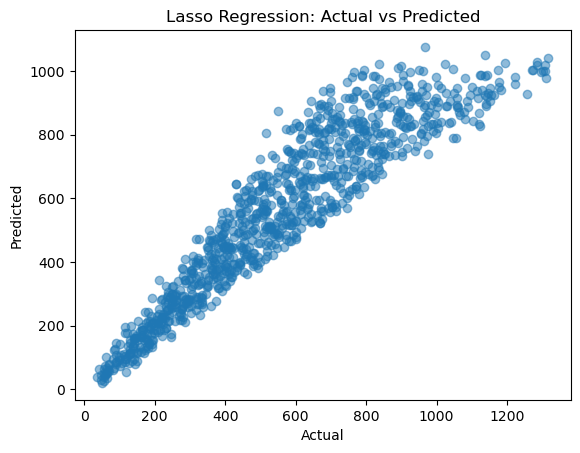

In [411]:
import matplotlib.pyplot as plt

y_pred = lasso.predict(x)
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()


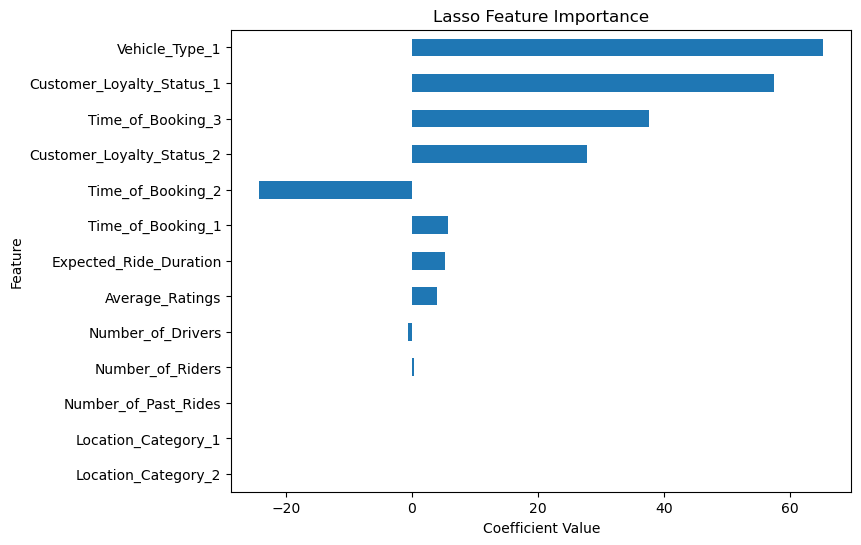

In [413]:
import matplotlib.pyplot as plt

feature_importance.plot(kind='barh', figsize=(8, 6))
plt.title("Lasso Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()
